In [2]:
# Main Code for Data 
import pandas as pd
import os
import csv
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
import scipy.stats as st

#Name of CSV
data = 'final_data.csv'

#read CSV
scatter_data = pd.read_csv(data)
scatter_data.head()

,MonthYear,Year,Sales,Price Per Gallon,Unemployment_Rate,Steel_Price_Index,New_Auto_Price_Index,Used_Auto_Price_Index
0,Jan-2005,2005,1052224.0,1.831,5.3,181.2,138.5,138.6
1,Feb-2005,2005,1244753.0,1.910,5.4,179.8,138.6,138.4
2,Mar-2005,2005,1564938.0,2.079,5.2,176.4,138.3,138.3
3,Apr-2005,2005,1493837.0,2.243,5.2,176.9,138.3,138.4
4,May-2005,2005,1488171.0,2.161,5.1,170.7,138.7,138.8


In [36]:
mean_gas = scatter_data.groupby('MonthYear').mean()['Price Per Gallon']
mean_sales = scatter_data.groupby('MonthYear').mean()['Sales']
mean_ue = scatter_data.groupby('MonthYear').mean()['Unemployment_Rate']
mean_steel=scatter_data.groupby('MonthYear').mean()['Steel_Price_Index']
mean_new=scatter_data.groupby('MonthYear').mean()['New_Auto_Price_Index']
mean_used=scatter_data.groupby('MonthYear').mean()['Used_Auto_Price_Index']

summary_mean = pd.DataFrame({"Average Gas Price":mean_gas,
                              "Average Auto Sales":mean_sales,
                             "Average Unemployment Rate":mean_ue,
                             "Average Steel Price Index": mean_steel,
                            "Average New Auto Price Index": mean_new,
                            "Average Used Auto Price Index": mean_used})
summary_mean.head()

,Average Gas Price,Average Auto Sales,Average Unemployment Rate,Average Steel Price Index,Average New Auto Price Index,Average Used Auto Price Index
MonthYear,,,,,,
Apr-2005,2.243,1493837.0,5.2,176.9,138.300,138.400
Apr-2006,2.742,1439311.0,4.7,180.7,137.900,141.000
Apr-2007,2.845,1326837.0,4.5,209.2,136.578,134.995
Apr-2008,3.458,1237336.0,5.0,250.6,134.726,137.659
Apr-2009,2.049,822746.0,9.0,168.9,134.367,121.887


The r-squared is: 0.00044488448267310574


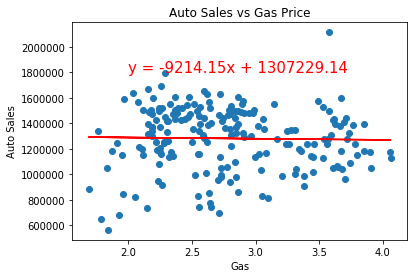

In [10]:
#linear regression graph for gas price vs auto sales
x_values = scatter_data["Price Per Gallon"]
y_values = scatter_data["Sales"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#print(line_eq)
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(2,1800000),fontsize=15,color="red")
plt.xlabel('Gas')
plt.ylabel('Auto Sales')
plt.title("Auto Sales vs Gas Price")
print(f"The r-squared is: {rvalue**2}")

#Saves to file 
plt.savefig("Images/LinRegression Gas v Auto Sales.png")
plt.show()

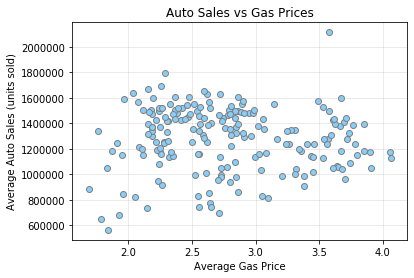

The correlation coefficient between gas price and auto sales is -0.02


In [5]:
# Generate a scatter plot gas price vs. auto sales
plt.scatter(mean_gas, mean_sales, color="lightskyblue", edgecolor="grey")
plt.xlabel("Average Gas Price")
plt.ylabel("Average Auto Sales (units sold)")
plt.title("Auto Sales vs Gas Prices")
plt.grid(linestyle="-", linewidth=1, alpha=0.25)

#Saves to file 
plt.savefig("Images/Gas vs Auto Sales.png")
plt.show()
print(f"The correlation coefficient between gas price and auto sales is {round(st.pearsonr(mean_gas,mean_sales)[0],2)}")

The r-squared is: 0.3786811858055365


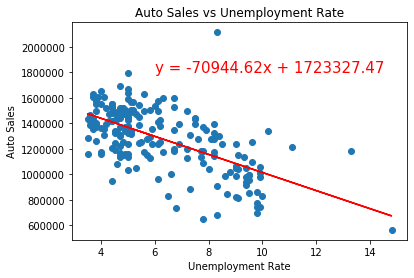

In [11]:
#linear regression graph for unemployment rate vs auto sales
x_values = scatter_data["Unemployment_Rate"]
y_values = scatter_data["Sales"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#print(line_eq)
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,1800000),fontsize=15,color="red")
plt.xlabel('Unemployment Rate')
plt.ylabel('Auto Sales')
plt.title("Auto Sales vs Unemployment Rate")
print(f"The r-squared is: {rvalue**2}")

#Saves to file 
plt.savefig("Images/LinRegression Unemployment v Auto Sales.png")
plt.show()

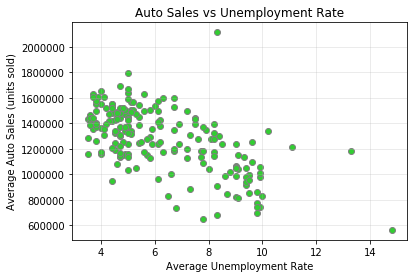

The correlation coefficient between unemployment rate and auto sales is -0.62


In [12]:
# Generate a scatter plot of unemployment rate vs. auto sales
plt.scatter(mean_ue, mean_sales, color="limegreen", edgecolor="grey")
plt.xlabel("Average Unemployment Rate")
plt.ylabel("Average Auto Sales (units sold)")
plt.title("Auto Sales vs Unemployment Rate")
plt.grid(linestyle="-", linewidth=1, alpha=0.25)

#Saves to file 
plt.savefig("Images/Unemployment vs Auto Sales.png")
plt.show()
print(f"The correlation coefficient between unemployment rate and auto sales is {round(st.pearsonr(mean_ue,mean_sales)[0],2)}")

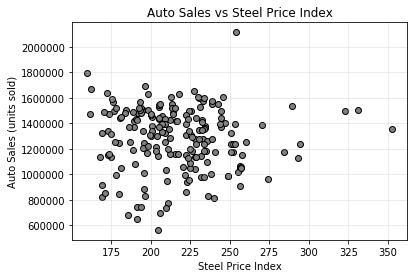

The correlation coefficient between auto sales and steel price index is -0.03


In [7]:
# Generate a scatter plot of auto sales vs. steel price index
plt.scatter(mean_steel, mean_sales, color="grey", edgecolor="black")
plt.xlabel("Steel Price Index")
plt.ylabel("Auto Sales (units sold)")
plt.title("Auto Sales vs Steel Price Index")
plt.grid(linestyle="-", linewidth=1, alpha=0.25)

#Saves to file 
plt.savefig("Images/Auto Sales vs Steel Price Index.png")
plt.show()
print(f"The correlation coefficient between auto sales and steel price index is {round(st.pearsonr(mean_steel,mean_sales)[0],2)}")

The r-squared is: 0.0007519121051566271


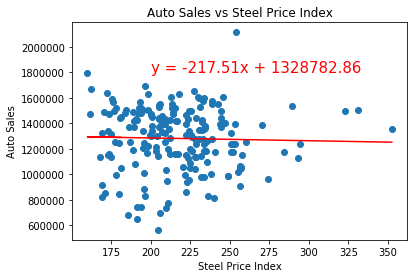

In [14]:
#line equation
x_values = scatter_data["Steel_Price_Index"]
y_values = scatter_data["Sales"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#print(line_eq)
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(200,1800000),fontsize=15,color="red")
plt.xlabel('Steel Price Index')
plt.ylabel('Auto Sales')
plt.title("Auto Sales vs Steel Price Index")
print(f"The r-squared is: {rvalue**2}")

#Saves to file 
plt.savefig("Images/LinRegression Steel v Auto Sales.png")
plt.show()

The r-squared is: 0.20473944478795195


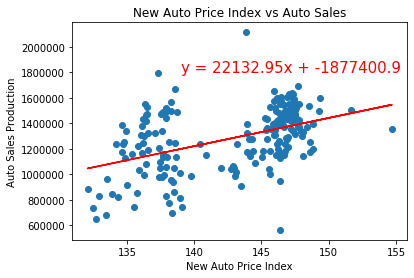

In [32]:
#line equation
x_values = scatter_data["New_Auto_Price_Index"]
y_values = scatter_data["Sales"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#print(line_eq)
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(139,1800000),fontsize=15,color="red")
plt.xlabel('New Auto Price Index')
plt.ylabel('Auto Sales')
plt.title("New Auto Price Index vs Auto Sales")
print(f"The r-squared is: {rvalue**2}")

#Saves to file 
plt.savefig("Images/LinRegression New Auto Price v Auto Sales Prod.png")
plt.show()

The r-squared is: 0.05536222608822751


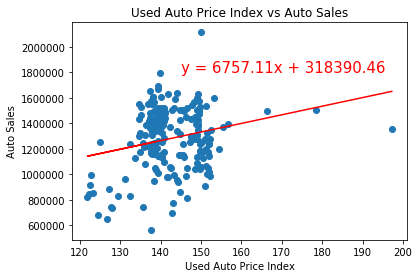

In [33]:
#line equation
x_values = scatter_data["Used_Auto_Price_Index"]
y_values = scatter_data["Sales"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#print(line_eq)
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(145,1800000),fontsize=15,color="red")
plt.xlabel('Used Auto Price Index')
plt.ylabel('Auto Sales')
plt.title("Used Auto Price Index vs Auto Sales")
print(f"The r-squared is: {rvalue**2}")

#Saves to file 
plt.savefig("Images/LinRegression Used Auto Price v Auto Sales Prod.png")
plt.show()

In [39]:
print(f"The correlation coefficient between auto sales and new vehicle price index is \
{round(st.pearsonr(mean_new,mean_sales)[0],2)}")

The correlation coefficient between auto sales and new vehicle price index is 0.45


In [38]:
print(f"The correlation coefficient between auto sales and used vehicle price index is \
{round(st.pearsonr(mean_used,mean_sales)[0],2)}")

The correlation coefficient between auto sales and used vehicle price index is 0.24
